In [1]:
####################################### THREE OBSERVABLE TRENDS ################################################

#1. Vader sentiment score for CBS news is negative.
#2. CNN news & Fox news has positive Vader sentiment score.
#3. The Vader analysis of news media is not stable as it is highly dependent on the type of news 
#   happening on that particular day.
#4. The Vader analysis is also dependent on the number of tweets which is indirectly dependent on the peoples' 
#   choices based on political party affiliation. For example, Fox news supports Republican party, so 
#   people who support Republican party follow Fox news, which affects the sentiment score.
#5. Plotblot graph shows better sentiment velocity for the various news organizations.





In [47]:
# Dependencies Set up
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import time
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Import Twitter API Keys 
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [48]:
##################### Sentiment Analysis of the Twitter Activity of the various News Outlets #####################

# Target News Organizations Terms
news_outlet = ["@BBCNews", "@CBSNews", "@CNN","@FoxNews", "@nytimes"]

# Set Variables
counter = 1
sentiments =[]

# Looping through all the news outlets
for outlet in news_outlet:
    public_tweets = api.user_timeline(outlet, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
         # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        
        # Save the tweet time
        raw_time = tweet["created_at"]
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        
        sentiments.append({"Media Source": outlet,
                           "Tweets":tweet["text"],
                           "Date": converted_time,
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets Ago": tweetnumber})
        tweetnumber +=1
        counter +=1

        

Tweet 1: Theresa May urges Labour voters to abandon Corbyn for Tories https://t.co/MffPIqIHWo
Tweet 2: Jamal Khashoggi: Turkey investigates missing journalist https://t.co/FRq1XYLFJg
Tweet 3: Bean-slicers and bedwarmers: Household items we miss the most https://t.co/2XzWvsCX2f
Tweet 4: Can social networks help you lose weight? https://t.co/de605f3EBq
Tweet 5: Premier League: Manchester United, Tottenham, Everton, Wolves &amp; Bournemouth win https://t.co/dlKp0ccddn
Tweet 6: Two men arrested after three police officers stabbed https://t.co/PxBni885Xp
Tweet 7: Pret a Manger confirms second allergy death https://t.co/hT8NB3xsE7
Tweet 8: Child mental health referrals up 26% in five years, says report https://t.co/Fafppl3oOk
Tweet 9: Is my washing to blame for the plastic problem? https://t.co/2UeHduAy7B
Tweet 10: Nicola Adams beats Mexican Isabel Millan to close in on world title bout https://t.co/JmsTnxNirm
Tweet 11: DR Congo oil tanker collision leaves at least 50 dead https://t.co/tvIWn

Tweet 101: Cristiano Ronaldo scores for Juventus amid rape allegation https://t.co/BlG7FCQrhF https://t.co/HL23Uq56J3
Tweet 102: Monty Python's Eric Idle still looking on the "Bright Side of Life" https://t.co/AWWF9Ro4nO https://t.co/i7RsB5Q8TO
Tweet 103: Lady Gaga gives emotional defense of Christine Blasey Ford on "The Late Show with Stephen Colbert"… https://t.co/VCvtrdffdB
Tweet 104: Walmart recalls nearly a quarter million axes https://t.co/Z0WG2zY8mZ https://t.co/tu45RW3FF7
Tweet 105: The disappearing middle-wage job https://t.co/d9cqKfh9xT https://t.co/dUFO9smBTR
Tweet 106: Can a Supreme Court justice be impeached? https://t.co/swEiQ9Bqrl https://t.co/tUX7WqZmBe
Tweet 107: Tokyo's iconic Tsukiji fish market, a popular tourist spot, closes after 83 years https://t.co/JHmuldS1ys https://t.co/ceLkcywyaD
Tweet 108: Garbage found after Yellowstone geyser erupts https://t.co/WAv19H2x5K https://t.co/5PgpnKLrbO
Tweet 109: Officer who killed Tamir Rice hired by rural police force https:/

Tweet 201: At 120 years old, the Star Ferry is Hong Kong's oldest form of public transportation -- and the company's green and… https://t.co/Jnm2qQ48dZ
Tweet 202: A man's vision changed dramatically after he took a gulp of a drug he bought online that is commonly used to treat… https://t.co/Gcrsyuu4yF
Tweet 203: A magnitude 5.9 earthquake struck near Haiti, according to the US Geological Survey. There was damage in the northe… https://t.co/m9BpEKLDOs
Tweet 204: Officer who shot Tamir Rice hired by small police department in Ohio https://t.co/KPwJaVw4y6
Tweet 205: How Kavanaugh maneuvered to win his confirmation fight https://t.co/7J7c4uPoiP
Tweet 206: Banksy painting 'self-destructs' moments after being sold for $1.4 million at auction https://t.co/2y4UtGFAhS https://t.co/6juJnfScgH
Tweet 207: Senate Judiciary Chairman Chuck Grassley: Chief Justice Roberts "could create the center" on the Supreme Court… https://t.co/0qMTJNGSoZ
Tweet 208: Former Secretary of State John Kerry said he has

Tweet 301: .@POTUS: "For years you watched as your leaders apologized for America. And now you have a president who is standin… https://t.co/jUiUjkqnz9
Tweet 302: .@SteveDoocy: The dessert that almost killed me (via @FoxNewsOpinion)
 https://t.co/V7Nj5Vo04f
Tweet 303: President @realDonaldTrump: "And on my direction, the Pentagon is now working to create the sixth branch of the Ame… https://t.co/P9YS3mOlJb
Tweet 304: In a statement, House Minority Leader Nancy Pelosi blasted Senate Republicans following the confirmation of Judge B… https://t.co/WNuedv969i
Tweet 305: President @realDonaldTrump "This election is about safety, and it's also about prosperity." https://t.co/dEeJnuU8hC
Tweet 306: Swing-vote senators face major political blowback, and potential high-profile challengers, after casting pivotal Ka… https://t.co/DJ4WcO9prk
Tweet 307: President @realDonaldTrump: "Manufacturing confidence is at an all-time high." https://t.co/ZO8TiBG7Hb
Tweet 308: Haiti struck by magnitude-5.9 eart

Tweet 401: There may be no more perfectly satisfying treat than a Canadian butter tart https://t.co/byZ1t2dMCf
Tweet 402: RT @NYTBen: Here's what we know, so far, about the alleged killing of Saudi commentator Jamal Khashoggi in the Saudi consulate in Istanbul.…
Tweet 403: Yankees 6, Red Sox 2 | Series is tied, 1-1.: Yankees Flex Muscles and Even Series With the Red Sox https://t.co/q0zAoO8S7k
Tweet 404: Our investigation revealed that Donald Trump received the equivalent today of at least $413 million from his father… https://t.co/kO6FTCwALU
Tweet 405: Election Day in the U.S. is Nov. 6, but voter registration deadlines in many states are well before that.

See what… https://t.co/7R0fFQbeWy
Tweet 406: Even though he has started 6th grade, T.J. still reads at a 1st-grade level. And as his years in school fall away,… https://t.co/3g4xFIm7ER
Tweet 407: RT @adamliptak: Judge Brett Kavanaugh’s confirmation to the Supreme Court was a triumph for the conservative legal movement.  But it came

In [49]:
# Create a data frame from the dictionary
news_mood_df=pd.DataFrame.from_dict(sentiments)

## Testing
# news_mood_df["User"].describe()
# cols = list(news_mood_df.columns.values)#check
# print (cols)

# Visualize the DataFrame
news_mood= news_mood_df[['Media Source','Date','Tweets','Compound','Positive','Neutral','Negative','Tweets Ago']]
news_mood.head()


,Media Source,Date,Tweets,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBCNews,2018-10-07 04:03:02+00:00,Theresa May urges Labour voters to abandon Cor...,-0.4404,0.000,0.775,0.225,1
1,@BBCNews,2018-10-07 02:04:28+00:00,Jamal Khashoggi: Turkey investigates missing j...,-0.2960,0.000,0.732,0.268,2
2,@BBCNews,2018-10-07 01:53:24+00:00,Bean-slicers and bedwarmers: Household items w...,-0.1531,0.000,0.849,0.151,3
3,@BBCNews,2018-10-07 01:45:58+00:00,Can social networks help you lose weight? http...,0.0000,0.237,0.526,0.237,4
4,@BBCNews,2018-10-07 01:38:43+00:00,"Premier League: Manchester United, Tottenham, ...",0.7650,0.423,0.577,0.000,5


In [50]:
# Removing '@' from the Media Source
news_mood['Media Source'] = news_mood['Media Source'].map(lambda x: x.lstrip('@'))
news_mood.head()







,Media Source,Date,Tweets,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBCNews,2018-10-07 04:03:02+00:00,Theresa May urges Labour voters to abandon Cor...,-0.4404,0.000,0.775,0.225,1
1,BBCNews,2018-10-07 02:04:28+00:00,Jamal Khashoggi: Turkey investigates missing j...,-0.2960,0.000,0.732,0.268,2
2,BBCNews,2018-10-07 01:53:24+00:00,Bean-slicers and bedwarmers: Household items w...,-0.1531,0.000,0.849,0.151,3
3,BBCNews,2018-10-07 01:45:58+00:00,Can social networks help you lose weight? http...,0.0000,0.237,0.526,0.237,4
4,BBCNews,2018-10-07 01:38:43+00:00,"Premier League: Manchester United, Tottenham, ...",0.7650,0.423,0.577,0.000,5


In [51]:
# Save data frame to CSV
news_mood.to_csv("News Mood Tweets.csv")

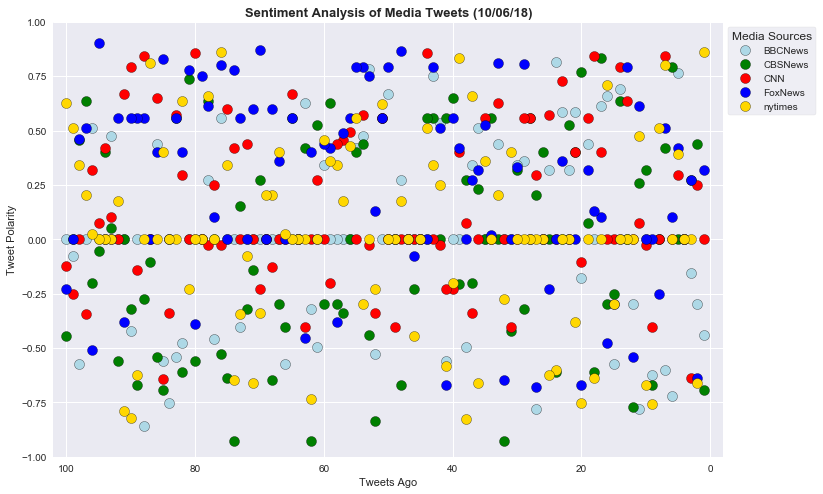

In [52]:
# Plot1: # Build a scatter plot
# Set colors
news_colors={"BBCNews": "lightblue",
             "CBSNews":"green", 
             "CNN":"red",
             "FoxNews":"blue",
             "nytimes": "gold"}

# Set other graph properties
sns.set()
plt.figure(figsize = (12,8))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%y")),fontweight='bold',fontsize=13)
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
for newsoutlet in news_colors.keys():
    df = news_mood[news_mood['Media Source'] == newsoutlet]
    sentiment_analysis = plt.scatter(df["Tweets Ago"],df["Compound"], label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black", s=100)
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources',frameon = True)    

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches="tight")

# Show the Plot
plt.show()


In [53]:
# Aggregate the compound sentiments for each news outlet
sentimentsbyoutlet=news_mood.groupby("Media Source")["Compound"].mean()
sentimentsbyoutlet



Media Source
BBCNews    0.014036
CBSNews   -0.008818
CNN        0.150998
FoxNews    0.224340
nytimes    0.027067
Name: Compound, dtype: float64

In [54]:
x_axis=np.arange(len(sentimentsbyoutlet))
x_axis

array([0, 1, 2, 3, 4])

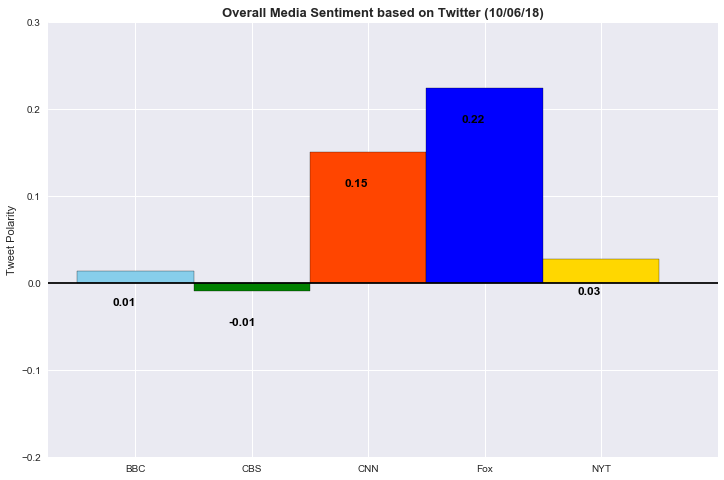

In [62]:
# Plot1: # Build Bar chart
sns.set()

# Set colors
news_colors={"BBCNews": "lightblue",
             "CBSNews":"green", 
             "CNN":"red",
             "FoxNews":"blue",
             "nytimes": "gold"}
# Set other graph properties
plt.figure(figsize = (12,8))

for newsoutlet in news_colors.keys():
    df = news_mood[news_mood['Media Source'] == newsoutlet]
#     print (news_colors[newsoutlet])

overall_media_sentiment = plt.bar(x_axis, sentimentsbyoutlet, tick_label = newsoutlet,
                                  color = ['skyblue', 'green', 'orangered', 'blue', 'gold'], width=1, edgecolor = "black")


plt.ylim(-.2, .3)
#plt.ylim(-0.2, 0.05)
plt.ylabel("Tweet Polarity")

# Adds a horizontal line at zero
plt.axhline(y=0, color = 'black') 

# Adds aggregate text on the bars
for a, k in enumerate(sentimentsbyoutlet):
    plt.text(a-.2, k-0.04,  str(round(k,2)), color='black', fontweight='bold')

# Set Plot Properties
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%y")),fontweight='bold',fontsize=13)
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]

# Tick locations
x_locations = [value for value in np.arange(6)]
plt.xticks(x_locations, x_labels)

# Save the figure
plt.savefig('Overall Media Sentiment Based on Twitter.png', bbox_inches="tight")

# Show the Plot
plt.show()


In [56]:
# Lookup & Grab each Media Source specific data -["BBC", "CBS", "CNN", "Fox", "New York Times"]

bbc = news_mood.loc[news_mood["Media Source"] == "BBCNews"]
cbs = news_mood.loc[news_mood["Media Source"] == "CBSNews"]
cnn = news_mood.loc[news_mood["Media Source"] == "CNN"]
fox = news_mood.loc[news_mood["Media Source"] == "FoxNews"]
nyt = news_mood.loc[news_mood["Media Source"] == "nytimes"]

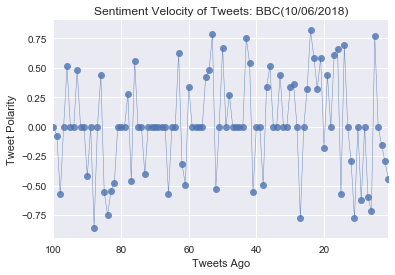

In [57]:
## PlotBot
x_vals = bbc['Tweets Ago']
y_vals = bbc['Compound']

# Plot Time span Between Tweets for BBC

plt.plot(x_vals, y_vals, marker="o", linewidth=0.5,alpha=0.8)

# Setting other graph properties
Date = datetime.now().strftime("(%m/%d/%Y)")
plt.title(f"Sentiment Velocity of Tweets: %s" % 'BBC'  +  str(Date))
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save the plot
plt.savefig("BBC.png")

# Display the plot
plt.show()

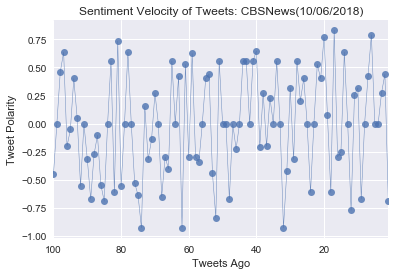

In [58]:
## PlotBot
x_vals = cbs['Tweets Ago']
y_vals = cbs['Compound']
# Plot Time span Between Tweets for CBS

plt.plot(x_vals, y_vals, marker="o", linewidth=0.5,alpha=0.8)

# Setting other graph properties
Date = datetime.now().strftime("(%m/%d/%Y)")
plt.title(f"Sentiment Velocity of Tweets: %s" % 'CBSNews'  +  str(Date))
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save the plot
plt.savefig("CBS.png")

# Display the plot
plt.show()

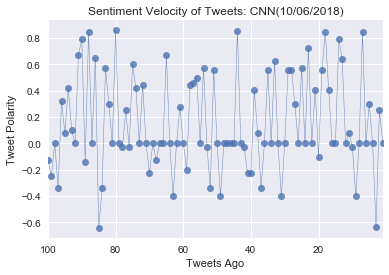

In [59]:
## PlotBot
x_vals = cnn['Tweets Ago']
y_vals = cnn['Compound']
# Plot Time span Between Tweets for CNN

plt.plot(x_vals, y_vals, marker="o", linewidth=0.5,alpha=0.8)

# Setting other graph properties
Date = datetime.now().strftime("(%m/%d/%Y)")
plt.title(f"Sentiment Velocity of Tweets: %s" % 'CNN'  +  str(Date))
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save the plot
plt.savefig("CNN.png")

# Display the plot
plt.show()

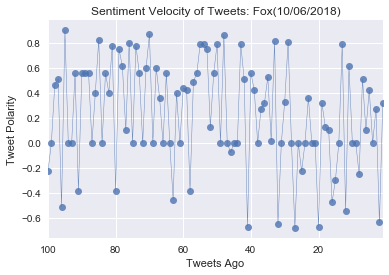

In [60]:
## PlotBot
x_vals = fox['Tweets Ago']
y_vals = fox['Compound']
# Plot Time span Between Tweets for Fox

plt.plot(x_vals, y_vals, marker="o", linewidth=0.5,alpha=0.8)

# Setting other graph properties
Date = datetime.now().strftime("(%m/%d/%Y)")
plt.title(f"Sentiment Velocity of Tweets: %s" % 'Fox'  +  str(Date))
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save the plot
plt.savefig("Fox.png")

# Display the plot
plt.show()

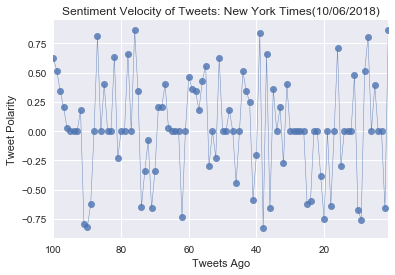

In [61]:

## PlotBot
x_vals = nyt['Tweets Ago']
y_vals = nyt['Compound']

# Plot Time span Between Tweets for NYT

plt.plot(x_vals, y_vals, marker="o", linewidth=0.5,alpha=0.8)

# Setting other graph properties
Date = datetime.now().strftime("(%m/%d/%Y)")
plt.title(f"Sentiment Velocity of Tweets: %s" % 'New York Times'  +  str(Date))
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Save the plot
plt.savefig("NYT.png")

# Display the plot
plt.show()